# Project 2019 Programming for Data Analysis

* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.<br>
* Investigate the types of variables involved, their likely distributions, and their relationships with each other<br>
* Synthesise/simulate a data set as closely matching their properties as possible.<br>
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.<br>


# Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

I have selected a dataset that is available on www.data.gov.ie. <br>
This is an initiative by the government of Ireland that makes data held by public bodies available and easily accessible online for reuse and redistribution.<br>
I have chosen the OPW Heritage Site Details open dataset.<br>
The Office of Public Works is a government department with responsibility for the day-to-day running of all National Monuments in State care and National Historic Properties.  The dataset relates to the Heritage Sites that are open to the public and contains various information collected in 2015.<br>
I chose this dataset because it is of interest to me in my professional life. <br>In this project, I will compare the data concerning sites' geographical location/region, cost of entry, number of visitors and the relationships between the datapoints.

In [1]:
#Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import csv

In [58]:
#Load the dataset from a URL
#To fix a Unicode error while reading a CSV file, encoding="ISO-8859–1" is added to the code
df=pd.read_csv("https://www.opw.ie/en/media/opw-heritage-site-details.csv", encoding="ISO-8859–1")
#df=pd.read_csv("https://raw.githubusercontent.com/ClodaghMurphy/ProgDA_ProjectDec2019/master/New.csv", encoding="ISO-8859–1")

In [59]:
print("Load CSV file from a url into a dataframe and print")
df

Load CSV file from a url into a dataframe and print


,Id,X,Y,WGS84 Web Mercator (Auxiliary Sphere) Coordinates,GPS (WGS84) (deg) Coordinates,Latitude,Longitude,GPS Coordinates (Google Maps),Name,Address,...,email,Heritage Ireland Webpage,Website,Opening Hours,Admission Charges,Facilities,Image URL,Site Type,Region,2015 Visitor Numbers
0,50,-977660.64,6903754.18,"-977660.64, 6903754.18","52.56946432612431°N, -8.782474994659424°E",52.569464,-8.782474995,"52.56946432612431, -8.782474994659424",Adare Castle,Adare,...,adareheritage@eircom.net,www.heritageireland.ie/en/ShannonRegion/AdareC...,NaN,1 Jun - 30 Sep 2016\n\nAverage Length of Visit...,Adult: EUR 6.00\r\n\rChild/Student/Senior EUR ...,"Toilets, toilet for visitors with disabilities...",http://www.heritageireland.ie/en/media/061205%...,Heritage Site,Shannon,NaN
1,32,-748137.00,6934171.00,"-748137, 6934171","52.73522444703166°N, -6.720629017153264°E",52.735224,-6.720629017,"52.73522444703166, -6.720629017153264",Altamont Gardens,Tullow,...,altamontgardens@opw.ie,www.heritageireland.ie/en/South-East/AltamontG...,NaN,(Subject to change. Please telephone in advanc...,"Free, except for pre-booked guided tours.\r\n\...","Picnic tables, toilets, car park\r\n\r\nRestau...",http://www.heritageireland.ie/en/media/Altamon...,Heritage Site,South-East,"58,435"
2,57,-703252.00,7049788.00,"-703252, 7049788","53.35957224533105°N, -6.317420201876216°E",53.359572,-6.317420202,"53.35957224533105, -6.317420201876216",Aras an Uachtarain,Phoenix Park,...,phoenixparkvisitorcentre@opw.ie,www.heritageireland.ie/en/Dublin/ArasanUachtar...,www.president.ie & www.araskids.ie,NaN,Free admission tickets are issued at the Phoen...,Restaurant / Tearooms: Restaurant in the groun...,http://www.heritageireland.ie/en/media/ArasanU...,Heritage Site,Dublin,"4,343"
3,58,-699881.32,7048170.60,"-699881.32, 7048170.6","53.35090034751662°N, -6.287140846252441°E",53.350900,-6.287140846,"53.35090034751662, -6.287140846252441",Arbour Hill Cemetery,Arbour Hill,...,superintendent.park@opw.ie,www.heritageireland.ie/en/Dublin/ArbourHillCem...,NaN,All year round:\r\nMon-Fri: 08:00 - 16:00\r\nS...,Free,Restaurant/Tearooms: None,http://www.heritageireland.ie/en/media/071024%...,Heritage Site,Dublin,NaN
4,51,-1088870.00,6859756.00,"-1088870, 6859756","52.32857791069304°N, -9.781485634192231°E",52.328578,-9.781485634,"52.32857791069304, -9.781485634192231",Ardfert Cathedral,Ardfert,...,ardfertcathedral@opw.ie,www.heritageireland.ie/en/ShannonRegion/Ardfer...,NaN,28 April (open at 12:00) - \n28 September 201...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,NaN,http://www.heritageireland.ie/en/media/Ardfert...,Heritage Site,Shannon,"7,802"
5,8,-973424.00,7038710.00,"-973424, 7038710","53.300140957473324°N, -8.74441657128761°E",53.300141,-8.744416571,"53.300140957473324, -8.74441657128761",Athenry Castle,Athenry,...,athenrycastle@opw.ie,www.heritageireland.ie/en/West/AthenryCastle/,NaN,24 Mar - 1 Oct 2016: \nDaily 09:30 - 18:00\n02...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,"Exhibition, public car/coach parking available...",http://www.heritageireland.ie/en/media/Athenry...,Heritage Site,West,"10,848"
6,9,-1032577.00,7060828.00,"-1032577, 7060828","53.4187173267542°N, -9.275797011302833°E",53.418717,-9.275797011,"53.4187173267542, -9.275797011302833",Aughnanure Castle,Oughterard,...,aughnanurecastle@opw.ie,www.heritageireland.ie/en/West/AughnanureCastle/,NaN,16 Mar - 2 Nov 2016: Daily 09:30-18:00\n \r\nA...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,"Exhibition, toilets, car / coach park\r\n\r\nR...",http://www.heritageireland.ie/en/media/Aughnan...,Heritage Site,West,"36,929"
7,33,-775645.00,6844680.00,"-775645, 6844680","52.24573480922975°N, -6.967737585508862°E",52.245735,-6.967737586,"52.24573480922975, -6.967737585508862",Ballyhack Castle,Ballyhack,...,jerpointabbey@opw.ie,www.heritageireland.ie/en/South-East/Ballyahac...,NaN,21 May - 31 Aug 2016: 09:30 - 17:00\nSaturday ...,Free,Parking nearby in Village.\r\n\r\nRestaurant/T...,http://www.heritageireland.i

**Comment:** The output from the original dataset contained over 2400 rows, with just 100 containing data.
Inclusion of the argument nrows=100 to specify that just 100rows are required.

In [ ]:
df=pd.read_csv("https://www.opw.ie/en/media/opw-heritage-site-details.csv", encoding="ISO-8859–1",nrows=100)


In [ ]:
df

**Comment** 
As stated previously, I intend to compare the data concerning sites' geographical location/region, cost of entry, number of visitors and the relationships between the datapoints.

There is sufficient information contained "Address" and "Region" columns to provide for such an investigation. I will therefore remove the rows 
* WGS84 Web Mercator (Auxiliary Sphere) Coordinates		
* Latitude	
* Longitude	
* GPS Coordinates (Google Maps)	
* And the column "X" and "Y" because it is not clear what this information relates to.

In [ ]:
#Code adapted from https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python
#To delete a column, or multiple columns, use the name of the columns, and specify the “axis” as 1. 
df=df.drop(["X","Y","WGS84 Web Mercator (Auxiliary Sphere) Coordinates","Latitude","Longitude", "GPS Coordinates (Google Maps)"], axis=1)
df

In [ ]:
#Now several excess columns have been deleted, produce a list of the remaining columns.
print("Print Information about the OPW Heritage Site Details Open Dataset")
df.info()

In [ ]:
print("Print Contents of Admission Charges Column")
df['Admission Charges']

**Comment:** The Admission Charges column contains crucial data for this exercise, however it contains excess information than that will provide a challenge to adapt to financial information that is useful for data analysis.  

In [ ]:
#code adapted from https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
  
# new data frame with split value columns 
new = df["Admission Charges"].str.split("\r\n\r", n = 3, expand = True) 
  
# making separate adult admission column from new data frame 
df["Adult Admission"]= new[0] 
  
# making separate Senior/Group column from new data frame 
df["Senior_Group"]= new[1] 

# making separate Child/Student column from new data frame 
df["Child_Student"]= new[2] 

# making separate Family and any other information column from new data frame 
df["Family"]= new[3] 

In [ ]:
df

In [ ]:
#Unsuccessful attempt to remove string element, replace with blank space and change datatype to float, this is due 
#to extra text that is contained in the column plus non-uniform delimiting characters.
#I fear the only solution to keep the task moving will be to revert to excel software!
#code adapted from https://www.ritchieng.com/pandas-changing-datatype/
df['Child_Student'] = df.Child_Student.str.replace ('Child/Student: EUR', '').astype(float)

In [63]:
#!
#Data Cleaning.jpeg
![Data](Data Cleaning.jpeg)
#![image](https://github.com/ClodaghMurphy/ProgDA_ProjectDec2019/blob/master/Data%20Cleaning.jpeg)
#![](image.png) or

'[Data]' is not recognized as an internal or external command,
operable program or batch file.


### Summary of Section 1<br>
I have selected a dataset and carried out initial investigations to determine the contentsof the OPW Heritage Sites Dataset.<br>
I used pandas commands to remove columns of data that are not required and attempted to streamline the key data points which concern the pricing structure. <br>
Due to the limited timeframe involved in this project and the fact that it is not a test of data cleaning skills, I have decided to adjust it separately, re-save this truncated version in the github repository and continue the project with the updated format.  

# Investigate the types of variables involved, their likely distributions, and their relationships with each other

In [64]:
#Load the dataset from a URL
#To fix a Unicode error while reading a CSV file, encoding="ISO-8859–1" is added to the code   
print("Load CSV file from a url into a dataframe and print")
df=pd.read_csv("https://raw.githubusercontent.com/ClodaghMurphy/ProgDA_ProjectDec2019/master/opw-heritage-site-detailsNEW.csv", encoding="ISO-8859–1")

Load CSV file from a url into a dataframe and print


In [4]:
df

,Name,County,Admission Charges,Adult,Senior,Group,Child,Student,Family,Region,2015 Visitor Numbers
0,Adare Castle,Co. Limerick,Adult: EUR 6.00\r\n\rChild/Student/Senior EUR ...,6,5,5,5,5,15,Shannon,0
1,Altamont Gardens,Co. Carlow,"Free, except for pre-booked guided tours.\r\n\...",0,0,0,0,0,0,South-East,58435
2,Aras an Uachtarain,Dublin,Free admission tickets are issued at the Phoen...,0,0,0,0,0,0,Dublin,4343
3,Arbour Hill Cemetery,Dublin,Free,0,0,0,0,0,0,Dublin,0
4,Ardfert Cathedral,Co. Kerry,Adult: EUR 5.00\n\nSen/Group: EUR 4.00\n\nChil...,5,4,4,3,3,13,Shannon,7802
5,Athenry Castle,Co. Galway,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5,4,4,3,3,13,West,10848
6,Aughnanure Castle,Co. Galway,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5,4,4,3,3,13,West,36929
7,Ballyhack Castle,Co. Wexford,Free,0,0,0,0,0,0,South-East,2613
8,Barryscourt Castle,Co.Cork,Free,0,0,0,0,0,0,South-West,0
9,Battle of the Boyne,Co. Meath,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5,4,4,3,3,13,Midlands & East Coast,58053


In [5]:
#to save keystrokes, when "df" is typed, the notebook will automatically load the OPW data set from the github repository.
print("Information about the OPW Dataset")
df.info()

Information about the Tips Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
Name                    100 non-null object
County                  100 non-null object
Admission Charges       99 non-null object
Adult                   100 non-null int64
Senior                  100 non-null int64
Group                   100 non-null int64
Child                   100 non-null int64
Student                 100 non-null int64
Family                  100 non-null int64
Region                  99 non-null object
2015 Visitor Numbers    100 non-null int64
dtypes: int64(7), object(4)
memory usage: 8.7+ KB


**Comment:**
Each row represents an individually named OPW Heritage Site, it's County and Region, data pertaining to the different entry fees and the number of visitors at each site in 2015.

In [66]:
#Print a description of the output
print("Description of the OPW Dataset")
df.describe()
#if parentheses ()are not used, all columns will display but no useful summary statistics!
#According to pandas 0.25.1 documentation:
#For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. 
#By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

Description of the OPW Dataset


,Adult,Senior,Group,Child,Student,Family,2015 Visitor Numbers
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.930000,2.310000,2.310000,1.700000,1.810000,7.490000,51411.470000
std,3.245058,2.565092,2.572956,1.866775,2.101923,8.370819,95609.074832
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12526.500000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,13.000000,53375.250000
max,12.000000,9.000000,9.000000,7.000000,8.000000,32.000000,553348.000000


**Comment:** the output confirms that there are 100 data points<br>
A large amount of free sites and sites where no visitor numbers were collected produces unusual results in many of the columns e.g. the 25% and 50% quartiles are zero across the range.


In [69]:
#Print a description of the output
print("OPW Dataset Head")
df.head()
#The head() command returns 5 as a default when no argument is entered

OPW Dataset Head


,Name,County,Admission Charges,Adult,Senior,Group,Child,Student,Family,Region,2015 Visitor Numbers
95,The Wexford Wildfowl Reserve,Co. Wexford,Free,0,0,0,0,0,0,South-East,0
96,Tintern Abbey,Co. Wexford,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5,4,4,3,3,13,South-East,15227
97,Trim Castle,Co. Meath,Including the Keep\nAdult: EUR 5.00\r\nSen/Gro...,5,4,4,3,3,13,Midlands & East Coast,86972
98,War Memorial Gardens,Dublin,Free,0,0,0,0,0,0,Dublin,0
99,Wicklow Mountains National Park,Co. Wicklow,Free,0,0,0,0,0,0,Midlands & East Coast,150125


In [70]:
#Print a description of the output
print("OPW Dataset Tail")
df.tail(10)
#The head() command returns 5 as a default when no argument is entered, I have entered 10 to be returned

OPW Dataset Tail


,Name,County,Admission Charges,Adult,Senior,Group,Child,Student,Family,Region,2015 Visitor Numbers
90,Ionad an Bhlascaoid Mhoir (The Blasket Centre),Co. Kerry,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5,4,4,3,3,13,South-West,48261
91,The Croppies Acre,Dublin,Free,0,0,0,0,0,0,Dublin,0
92,The Iveagh Gardens,Dublin,Free,0,0,0,0,0,0,Dublin,0
93,The John F Kennedy Arboretum,Co. Wexford,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5,4,4,3,3,13,South-East,96910
94,The Main Guard,Co. Tipperary,Free,0,0,0,0,0,0,South-East,7951
95,The Wexford Wildfowl Reserve,Co. Wexford,Free,0,0,0,0,0,0,South-East,0
96,Tintern Abbey,Co. Wexford,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5,4,4,3,3,13,South-East,15227
97,Trim Castle,Co. Meath,Including the Keep\nAdult: EUR 5.00\r\nSen/Gro...,5,4,4,3,3,13,Midlands & East Coast,86972
98,War Memorial Gardens,Dublin,Free,0,0,0,0,0,0,Dublin,0
99,Wicklow Mountains National Park,Co. Wicklow,Free,0,0,0,0,0,0,Midlands & East Coast,150125


**Comment:** Checking the "head" and "tail" entries on the dataset is a useful exercise to quickly
check the integrity of the dataset, particularly if it is a large one or if it may contain
non-english characters because vowel accents may cause the data to be rendered incorrectly.

In [76]:
#Print a description of the output
print("OPW Dataset: Site Name, Region, 2015 Visitor Numbers")
#this syntax is wrong : df['Name','Region', '2015 Visitor Numbers']
#this syntax [[double square brackets]] is correct
df[['Name','Region', '2015 Visitor Numbers']]
#the df command produces an indexed data series of the data columns that were passed into the argument.

OPW Dataset: Site Name, Region, 2015 Visitor Numbers


,Name,Region,2015 Visitor Numbers
0,Adare Castle,Shannon,0
1,Altamont Gardens,South-East,58435
2,Aras an Uachtarain,Dublin,4343
3,Arbour Hill Cemetery,Dublin,0
4,Ardfert Cathedral,Shannon,7802
5,Athenry Castle,West,10848
6,Aughnanure Castle,West,36929
7,Ballyhack Castle,South-East,2613
8,Barryscourt Castle,South-West,0
9,Battle of the Boyne,Midlands & East Coast,58053


**Comment:** This output provides an overview of visitor numbers in particular sites. It appears that some of the sites that don't contain any visitor data are public places in Dublin which would have a high amount (hundreds of thousands) of footfall e.g. Stephen's Green that would possibly skew figures even further than a null value.

In [11]:
#Print a description of the output
print("OPW Dataset - Use of .loc and Boolean format as a sorting tool")
#this is a useful tool using Boolean values to select item
#the command outputs only the results== Sun from the set in the previous cell
df.loc[df.loc[:, 'Region'] == 'West']


OPW Dataset - Use of .loc and Boolean format as a sorting tool


,Name,County,Admission Charges,Adult,Senior,Group,Child,Student,Family,Region,2015 Visitor Numbers
5,Athenry Castle,Co. Galway,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5,4,4,3,3,13,West,10848
6,Aughnanure Castle,Co. Galway,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5,4,4,3,3,13,West,36929
10,Boyle Abbey,Co. Roscommon,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5,4,4,3,3,13,West,6919
16,Ceide Fields,Co. Mayo,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5,4,4,3,3,13,West,32821
19,Connemara National Park,Co. Galway,Free,0,0,0,0,0,0,West,0
20,Coole Park,Co. Galway,Free,0,0,0,0,0,0,West,0
29,Dun Aonghasa,Co. Galway,Adult: EUR 5.00 \nSen/Group: EUR 4.00 \nChild/...,5,4,4,3,3,13,West,120104
72,Portumna Castle and Gardens,Co. Galway,Adult: EUR 5.00 \nSen/Group: EUR 4.00 \nChild/...,5,4,4,3,3,13,West,14237
73,Rathcroghan - Royal Celtic Site,Co Roscommon,Exhibition: \nAdult: EUR 7.00 \nSen...,7,6,6,3,6,20,West,0
89,Teach An Phiarsaigh (Patrick Peasrse's Cottage),Co. Galway,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5,4,4,3,3,13,West,8946


**Comment:** An overview of the sites in the Western Region.  Despite it's location on an island, Dun Aonghasa has a high number of visitors.  The majority of sites fall into the same price range to visit.

In [77]:

#Print a description of the output
print ("Pandas Groupby Function - Size of Grouping 'Adult' ")
#Code adapted from https://dfrieds.com/data-analysis/groupby-python-pandas
#Group by of a Single Column and Apply a Single Aggregate Method on a Column
#Groupby splits the data into a "group" depending on your choice of variable
#The size() argument returns a count of non-null values
df.groupby(by='Adult').size()

Pandas Groupby Function - Size of Grouping 'Adult' 


Adult
0     51
5     35
6      1
7      3
8      4
9      3
10     2
12     1
dtype: int64

In [ ]:
**Comment:**

In [42]:
#Print a description of the output
print ("Pandas Groupby Function - Size of Grouping 'Adult' ")
#Code verbatim from https://dfrieds.com/data-analysis/groupby-python-pandas
#Group by of a Single Column and Apply a Single Aggregate Method on a Column
#Groupby splits the data into a "group" depending on your choice of variable
#The size() argument returns a count of non-null values
df.groupby(by='2015 Visitor Numbers').size()

Pandas Groupby Function - Size of Grouping 'Adult' 


2015 Visitor Numbers
0         31
1750       1
2613       1
2634       1
3212       1
3737       1
4173       1
4343       1
5331       1
6919       1
7802       1
7951       1
8110       1
8946       1
9440       1
9493       1
10848      1
11150      1
11377      1
12493      1
12560      1
13244      1
14237      1
14416      1
15227      1
15592      1
16620      1
17280      1
18141      1
21843      1
          ..
37566      1
43767      1
47136      1
48261      1
51816      1
58053      1
58435      1
58557      1
67083      1
68532      1
69057      1
79182      1
86849      1
86972      1
95785      1
96910      1
107968     1
120104     1
141582     1
150125     1
157660     1
159686     1
231178     1
263887     1
282588     1
297691     1
300749     1
326635     1
410076     1
553348     1
Length: 70, dtype: int64

**Comment:**

In [52]:

#Print a description of the output
print ("Pandas Groupby Function - Grouping 'sex' showing mean of total_bill")
#Code verbatim from https://dfrieds.com/data-analysis/groupby-python-pandas
#Group by one columm and then perform an aggregate method on a different column.
#Sex becomes the index in the output and the mean of the total bill is returned alongside it.
df.groupby(by='Region')['2015 Visitor Numbers'].size()
#df.groupby(by='Region').size()
#tips.groupby(by='sex')['total_bill'].mean()

Pandas Groupby Function - Grouping 'sex' showing mean of total_bill


Region
Dublin                   22
Midlands & East Coast    18
North-West                7
Shannon                   7
South-East               19
South-West               16
West                     10
Name: 2015 Visitor Numbers, dtype: int64

In [54]:
#https://dfrieds.com/data-analysis/groupby-python-pandas
df.groupby(by='Region').agg({'2015 Visitor Numbers': lambda numbers: numbers.max() - numbers.min()}).rename(columns={'2015 Visitor Numbers': "range_total_bill"})

,range_total_bill
Region,
Dublin,553348
Midlands & East Coast,297691
North-West,47136
Shannon,11377
South-East,300749
South-West,95785
West,120104


In [55]:
df.groupby(by='County').agg({'2015 Visitor Numbers': ['count', 'mean', 'sum']})

2015 Visitor Numbers                        
                             count           mean      sum
County                                                    
Co Roscommon                     1       0.000000        0
Co. Carlow                       1   58435.000000    58435
Co. Clare                        3    4375.666667    13127
Co. Cork                         5   30979.800000   154899
Co. Donegal                      5   36472.400000   182362
Co. Dublin                       1       0.000000        0
Co. Galway                       7   27294.857143   191064
Co. Kerry                       12   21208.916667   254507
Co. Kildare                      2  159767.000000   319534
Co. Kilkenny                     4   88107.750000   352431
Co. Laois                        2    6622.000000    13244
Co. Leitrim                      1   16620.000000    16620
Co. Limerick                     2    5575.000000    11150
Co. Longford                     1    5331.000000     5331
Co. Louth                        1   12493.000000    12493
Co. Mayo                         1   32821.000000    32821
Co. Meath                        5  116602.800000   583014
Co. Offaly                       1  157660.000000   157660
Co. Roscommon                    1    6919.000000     6919
Co. Sligo                        2   26579.000000    53158
Co. Tipperary                    7   61013.285714   427093
Co. Waterford                    3   39051.666667   117155
Co. Wexford                      5   24838.000000   124190
Co. Wicklow                      4   74097.500000   296390
Co.Cork                          1       0.000000        0
Dublin                          22   79888.636364  1757550

**Comment:**

Data Visualisation - OPW Dataset hexplot of Region V 2015 Visitor Numbers


C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: can't multiply sequence by non-int of type 'float'

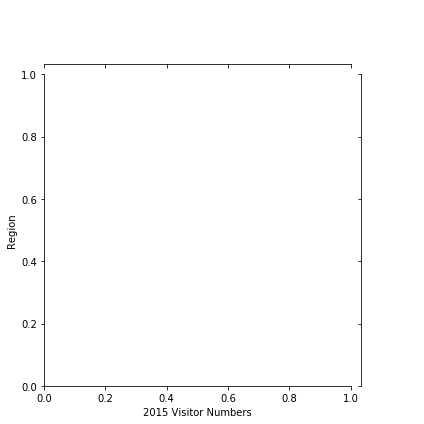

In [12]:

#Print a description of the output
print ("Data Visualisation - OPW Dataset hexplot of Region V 2015 Visitor Numbers")
#code verbatim from https://www.kaggle.com/ranjeetjain3/different-types-of-charts

sns.jointplot(y = 'Region', x = '2015 Visitor Numbers', data = df ,kind = 'hex')

Adult                     AxesSubplot(0.125,0.787927;0.0945122x0.0920732)
Senior                  AxesSubplot(0.238415,0.787927;0.0945122x0.0920...
Group                   AxesSubplot(0.351829,0.787927;0.0945122x0.0920...
Child                   AxesSubplot(0.465244,0.787927;0.0945122x0.0920...
Student                 AxesSubplot(0.578659,0.787927;0.0945122x0.0920...
Family                  AxesSubplot(0.692073,0.787927;0.0945122x0.0920...
2015 Visitor Numbers    AxesSubplot(0.805488,0.787927;0.0945122x0.0920...
dtype: object

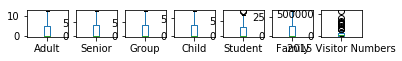

In [13]:
df.plot(kind='box', subplots=True, layout=(7,7), sharex=False, sharey=False)

#Command to display the plot

#plt.show()

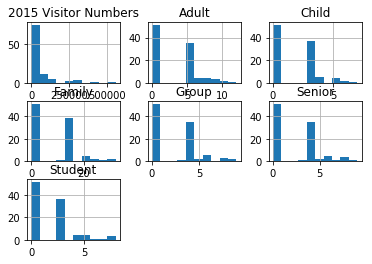

In [14]:
#05042019 Investigate the DataSet
#Data Visualisation with pands and matplotlib functions
#Adapted from
# Basic Analysis of the Iris Data set Using Python by Oluwasogo Oluwafemi Ogundowole
#https://medium.com/codebagng/basic-analysis-of-the-iris-data-set-using-python-2995618a6342
#Import pandas and matplotlib modules
import pandas
import matplotlib.pyplot as plt

#Rename the iris dataset to "dataset"
#dataset = pandas.read_csv('irisdataset.txt')

#A histogram is an accurate representation of the distribution of numerical data
#This is a type of univariate analysis, i.e. looking at just one subset of the data at a time.
#A histogram relates only one variable

df.hist()
plt.show()


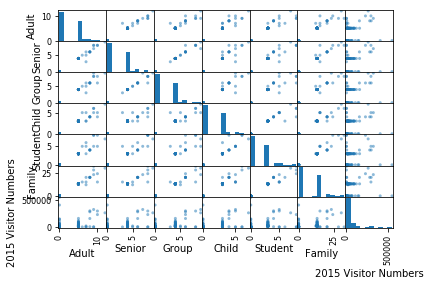

In [15]:
#05042019 Investigate the DataSet
#Data Visualisation with pands and matplotlib functions
#Adapted from
# Basic Analysis of the Iris Data set Using Python by Oluwasogo Oluwafemi Ogundowole
#https://medium.com/codebagng/basic-analysis-of-the-iris-data-set-using-python-2995618a6342
#Import pandas and matplotlib modules
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#Rename the iris dataset to "dataset"
#dataset = pandas.read_csv('irisdataset.txt')


#A scatterplot uses dots to represent pieces of data
#A scattermatrix displays all the fields on both x and y axis, 
# the variables are represented in both scatterplots and histograms
#This overview shows the correlation between the data and can help identify
#structured relationships between types of data

scatter_matrix(df)
plt.show()

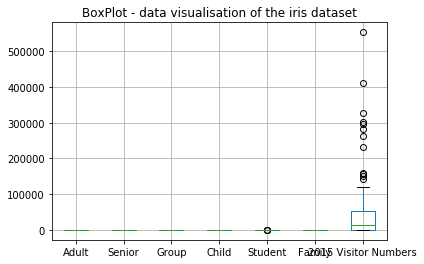

In [16]:
#05042019 Investigate the DataSet
#Data Visualisation with pands and matplotlib functions
#Adapted from
# Basic Analysis of the Iris Data set Using Python by Oluwasogo Oluwafemi Ogundowole
#https://medium.com/codebagng/basic-analysis-of-the-iris-data-set-using-python-2995618a6342
#Import pandas and matplotlib modules
import pandas
import matplotlib.pyplot as plt

#Rename the iris dataset to "dataset"
#dataset = pandas.read_csv('irisdataset.txt')

#Create a boxplot to view all the columns at once on the same scale which is helpful
#to put the data in context

plt.title ('BoxPlot - data visualisation of the iris dataset')
df.boxplot()
#Command to display the plot
plt.show()

In [17]:
#12042019 Investigate the DataSet
#Experimenting with pandas functions
#Adapted from
# https://stackoverflow.com/questions/33034243/calculating-the-mean-and-std-on-excel-file-using-python
#Import pandas module
import pandas
#
#The standard deviation is amount of variability (or spread) 
#among the numbers in a data set, that is the standard (or typical) 
# amount of deviation (or distance) from the mean
#https://wiki.kidzsearch.com/wiki/Standard_deviation

#dataset = pandas.read_csv('irisdataset.txt')
print(" 'std' calculates and displays the standard deviation in each column")
print(df.std())

 'std' calculates and displays the standard deviation in each column
Adult                       3.245058
Senior                      2.565092
Group                       2.572956
Child                       1.866775
Student                     2.101923
Family                      8.370819
2015 Visitor Numbers    95609.074832
dtype: float64


No handles with labels found to put in legend.


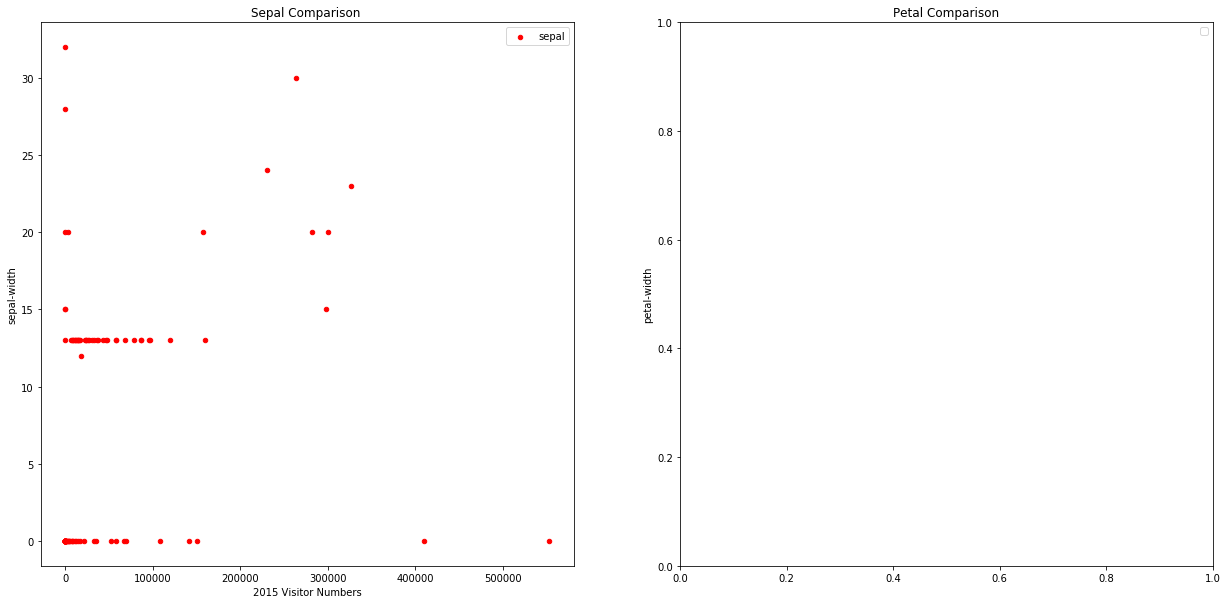

In [18]:
#12042019 Investigate the DataSet
#Data Visualisation with pands and matplotlib functions
#adapted from https://www.kaggle.com/abhishekkrg/python-iris-data-visualization-and-explanation

import matplotlib
import matplotlib.pyplot as plt
import pandas

#Plotting Scatterplot Petal Length vs Petal Width & Sepal Length vs Sepal width

#dataset = pandas.read_csv('irisdataset.txt')
#According to https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
#fig, ax = plt.sublots() creates just a figure and only one subplot
#ax can be either a single Axes object or an array of Axes objects if more than one subplot was created. 
fig,ax=plt.subplots(1,2,figsize=(21, 10))
#fig,ax=plt.subplots(1,2,figsize=(17, 9))

df.plot(y="Family",x="2015 Visitor Numbers",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
#df.plot(x="petal length in cm",y="petal width in cm",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal Comparison ', ylabel='sepal-width')
ax[1].set(title='Petal Comparison',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

plt.show()
#While this plot does not separate the different species, it's an interesting image to
#view and recognise how some petals measurements are very obviously distinguishable

Data Visualisation - Countplot of OPW Regions


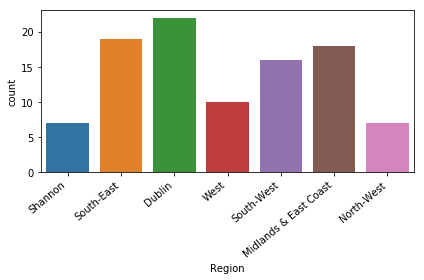

In [19]:
#Print a description of the output
print ("Data Visualisation - Countplot of OPW Regions")
#Code amended from https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
#Following on from the last plot, this countplot give a more accurate visualisation of the number of smokers versus non smokers.

ax = sns.countplot(x="Region", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()



Data Visualisation - Countplot of OPW Counties


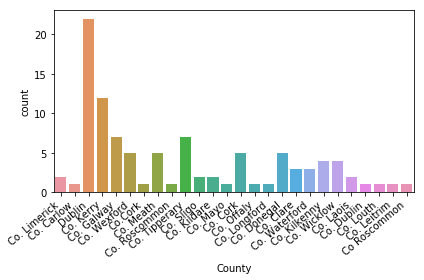

In [20]:
#Print a description of the output
print ("Data Visualisation - Countplot of OPW Counties")
#Code amended from https://amitkushwaha.co.in/data-visualization-part-1.html
#Following on from the last plot, this countplot give a more accurate visualisation of the number of smokers versus non smokers.

ax = sns.countplot(x="County", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

#sns.countplot('County', data=df)

Data Visualisation - Countplot of 2015 Visitor Numbers


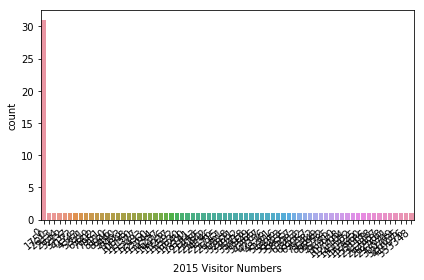

In [21]:


#Print a description of the output
print ("Data Visualisation - Countplot of 2015 Visitor Numbers")
#Code amended from https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
#Following on from the last plot, this countplot give a more accurate visualisation of the number of smokers versus non smokers.

ax = sns.countplot(x="2015 Visitor Numbers", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

Data Visualisation - Countplot of Adult Admission Charges


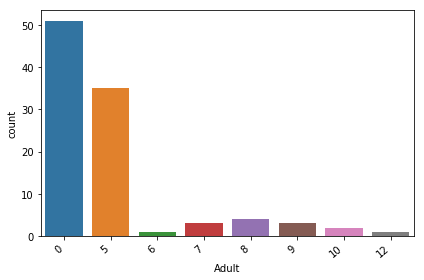

In [22]:
#Print a description of the output
print ("Data Visualisation - Countplot of Adult Admission Charges")
#Code amended from https://amitkushwaha.co.in/data-visualization-part-1.html
#Following on from the last plot, this countplot give a more accurate visualisation of the number of smokers versus non smokers.

ax = sns.countplot(x="Adult", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


TypeError: can't multiply sequence by non-int of type 'float'

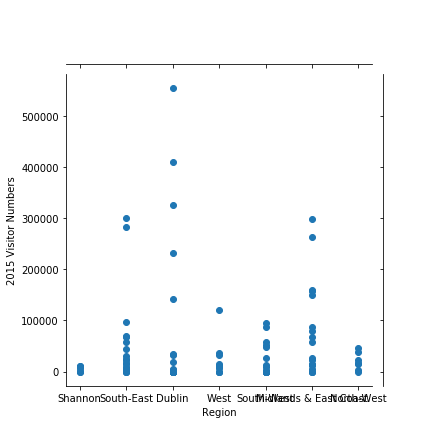

In [34]:
#https://seaborn.pydata.org/tutorial/distributions.html



sns.jointplot(x="Region", y="2015 Visitor Numbers", data=df);


**Summary of Section 2**
The dataset contains information about 100 Heritage Sites managed by The Office of Public Works collected in 2015.
* 51% of the sites have free admission, 35% have an adult entrance fee of €5.
* 31 of the entries for 2015 Visitor Numbers contain a null value which affects the mean statistics that can be extracted from the dataset.
* The remaining 69 datapoints show that visitor numbers range from 1750 to 553348


The eleven types of variables in the truncated dataset are
* Name of Heritage Site, County,Region - all objects
* Admission Charges is the original column that contains all the variations of charges and is also in object datatype.
* I have divided the Admissions Charges for Adult, Senior, Group, Child, Student and Family into separate columns -float64 datatype
* 2015 Visitor Numbers are datatype int64 (integers).

their likely distributions, 
The Heritage Sites are in 7 different geographical regions, the majority in Dublin, South - East and South-West.


and their relationships with each other